In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os

Format of the file: age_gender_ethnicity_datetime
## Load and Visualize data

In [19]:
path = "UTKFace/"
files = os.listdir(path)
#la lista dei file viene caricata in modo arbitratrio, quindi la ordino per conformarla
files.sort()
size = len(files)
print("Total samples:",size)
#print(files[0]) 

Total samples: 23708


In [20]:
import cv2
images = []
ages = []
genders = []
ethnicities = [] 
#prova = cv2.imread(path+files[43])
#cv2.imshow('prova',prova)
#cv2.waitKey()
#cv2.destroyAllWindows()

for file in files:
    image = cv2.imread(path + file, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, dsize=(64,64))
    #image = image.reshape((-1,image.shape[0],image.shape[1],3))
    images.append(image)
    split_var = file.split('_')
    ages.append(int(split_var[0]))
    genders.append(int(split_var[1]))
    ethnicities.append(int(split_var[2]))
    


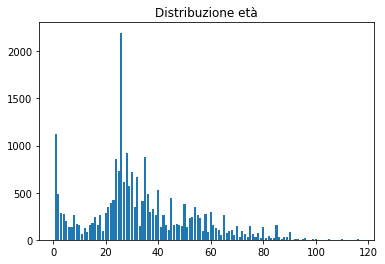

Max value: 116


In [117]:
import matplotlib.pyplot as plt
x_ages = list(set(ages))
y_ages = [ages.count(i) for i in x_ages]
plt.bar(x_ages,y_ages)
plt.title('Distribuzione età')
plt.show()
print("Max value:",max(ages))

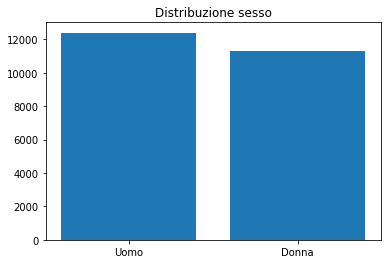

In [123]:
sesso = ['Uomo','Donna']

x_genders = list(set(genders))
y_genders = [genders.count(i) for i in x_genders]
plt.bar(sesso,y_genders)
plt.title('Distribuzione sesso')
plt.show()

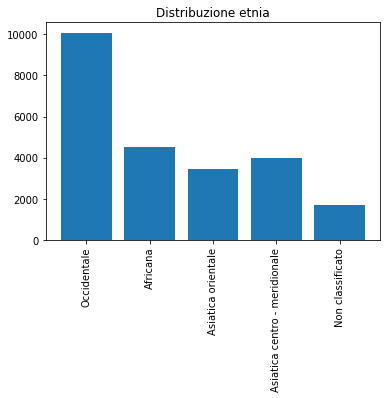

In [137]:
etnia = ['Occidentale','Africana','Asiatica orientale','Asiatica centro - meridionale', 'Non classificato']
x_ethnicities = list(set(ethnicities))
y_ethnicities = [ethnicities.count(i) for i in x_ethnicities]
plt.bar(etnia,y_ethnicities)
plt.xticks(rotation = 90)
plt.title('Distribuzione etnia')
plt.show()

Age: 105
Gender: 0
Ethnicity: 0


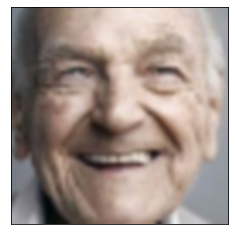

In [24]:
def display(img):
    #squeeze remove single-dimensional entries from the shape of an array.
    #img = np.squeeze(img)
    plt.imshow(img, interpolation='bicubic')
    plt.xticks([]), plt.yticks([]) 
    plt.show()

#X = np.squeeze(images)
idx = 14
sample = images[idx]
print("Age:",ages[idx])
print("Gender:",genders[idx])
print("Ethnicity:",ethnicities[idx])
display(images[1])

In [25]:
# pre processing
#target = np.zeros(size,dtype='int32')
features = []

for i in range(size):
    #target[i] = int(ages[i])
    
    featElement = np.array([int(genders[i]),int(ethnicities[i])])
    features.append(featElement)
    
    #CAPIRE SIGNIFICATO
#features[i] = features[i] / 255

features = np.asarray(features)

In [28]:
if 'target' not in locals():
    target = ages
    images = np.array(images)
    images = images / 255
#numericalFeatures = np.array([genders,ethnicities])
#df = pd.DataFrame([genders,ethnicities])

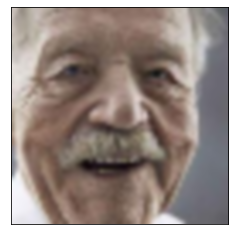

Name: 100_0_0_20170112215240346.jpg.chip.jpg
Age: 100
Sex: 0
Ethnicity: 0


In [29]:
idx=1
display(images[0])
print("Name:",files[idx])
print("Age:",target[idx])
print("Sex:",features[idx][1])
print("Ethnicity:",features[idx][1])

In [30]:
from sklearn.model_selection import train_test_split

#oltre ai soliti primi 4 parametri, inserisco name_train e name_test per inserire i nomi dei file per poterli dividere in cartelle
images_train, images_test, feat_train, feat_test, y_train, y_test, fileName_train, fileName_test = train_test_split(images, features, target, files, test_size=0.2,random_state=42,shuffle=True)
print("Samples in Training:",images_train.shape[0])
print("Samples in Testing:",images_test.shape[0])


Samples in Training: 18966
Samples in Testing: 4742


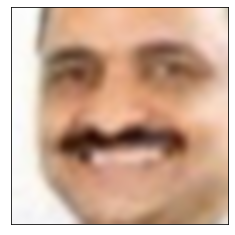

56
[0 3]
56_0_3_20170105180725694.jpg.chip.jpg


In [31]:
idx=1
display(images_train[idx])
print(y_train[idx])
print(feat_train[idx])
print(fileName_train[idx])

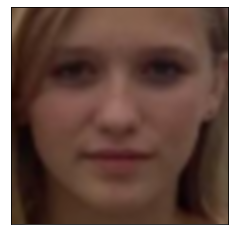

17
[1 0]
17_1_0_20170109214200825.jpg.chip.jpg


In [32]:
idx=1
display(images_test[idx])
print(y_test[idx])
print(feat_test[idx])
print(fileName_test[idx])

In [33]:
from pathlib import Path
import shutil
from collections import Counter

#controllo se le cartelle test e training sono già presenti
print("Cartella training?",os.path.isdir("training"))
print("Cartella test?",os.path.isdir("test"))



#controllo se i dati sono già presenti nelle cartelle (non è la prima esecuzione del codice)
firstExec = True
#DA MIGLIORARE EFFICIENZA
if((os.path.isdir("training")) and (os.path.isdir("test"))):
    trElements = os.listdir("training/")
    teElements = os.listdir("test/")
    if((Counter(fileName_train) == Counter(trElements)) and (Counter(fileName_test) == Counter(teElements))):
        firstExec = False

print("Prima esecuzione?",firstExec)

Cartella training? True
Cartella test? True
Prima esecuzione? False


In [34]:
#se è la prima esecuzione creo le cartelle e vi inserisco i file        
if(firstExec):
    #creo la cartella dove inserire le immagini di training
    Path("training").mkdir(parents=True, exist_ok=True)
    
    #copio le immagini di training
    for i in range(0,images_train.shape[0]):
        shutil.copy(path+fileName_train[i],"training/"+fileName_train[i])
    trElements = os.listdir("training/")
    #print(set(name_train).symmetric_difference(set(trElements)))
    assert Counter(fileName_train) == Counter(trElements),set(fileName_train).symmetric_difference(set(trElements))
    
    #creo la cartella dove inserire le immagini di test
    Path("test").mkdir(parents=True, exist_ok=True)
    #copio le immagini di test
    for i in range(0,images_test.shape[0]):
        shutil.copy(path+fileName_test[i],"test/"+fileName_test[i])
    teElements = os.listdir("test/")
    assert Counter(fileName_test) == Counter(teElements),set(fileName_test).symmetric_difference(set(teElements))
    

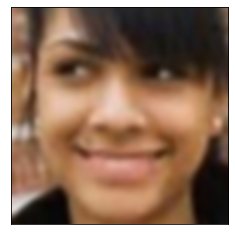

22
22_1_4_20170103233857003.jpg.chip.jpg


In [35]:
idx=50
display(images_train[idx])
print(y_train[idx])
print(fileName_train[idx])

## Build Model

In [36]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [111]:
#Necessità di aggiungere all'environment:
#conda install graphviz
#conda install pydotplus

import keras 
import tensorflow as tf
from keras.layers import *
from keras.models import *
from IPython.display import Image
from keras import backend as K


def create_cnn_model():

    filters=(16, 32, 64)
    
    # initialize the input shape and channel dimension, assuming
    # TensorFlow/channels-last ordering
    inputShape = (64, 64, 3)
    chanDim = -1
    
    # define the model input
    inputs = Input(shape=inputShape)
    
    # loop over the number of filters
    for (i, f) in enumerate(filters):
        # if this is the first CONV layer then set the input
        # appropriately
        if i == 0:
            x = inputs
        # CONV => RELU => BN => POOL
        x = Conv2D(f, (3, 3), padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        
    # flatten the volume, then FC => RELU => BN => DROPOUT
    x = Flatten()(x)
    
    #shape degli attributi numerici
    aux_rand = Input(shape=(2,))
    x = keras.layers.Concatenate(axis=1)([x, aux_rand])
    x = Dense(16)(x)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = Dropout(0.5)(x)

    x = Dense(2)(x)
    x = Activation("relu")(x)
    x = Dense(1, activation="linear")(x)

        
    # construct the CNN
    model = Model([inputs, aux_rand], x)
    model.compile(loss="mse", optimizer='adam', metrics=['accuracy'])
    tf.keras.utils.plot_model(model, 'model.png',show_shapes=True)  
   
    # return the CNN
    return model        
        
    

In [112]:
# train the model
batch_size = [25, 32, 80, 120]
nb_epoch = [25, 80, 160, 280, 500]
history_list = []

best_model = create_cnn_model()
hist_best_model = best_model.fit(x = [images_train, feat_train], y = y_train, epochs = 1, batch_size = 5000, validation_split=0.1, shuffle=True)


for batch in batch_size:
    for epoch in nb_epoch:
            print('epoch:',epoch,'batch:',batch)
            model = create_cnn_model()
            hist_model = model.fit(x = [images_train, feat_train], y = y_train, epochs = epoch, batch_size = batch, validation_split=0.1, shuffle=True)
            history_list.append(hist_model.history)
            
            mod_accuracy = np.mean(hist_model.history['accuracy'])
            best_mod_accuracy = np.mean(hist_best_model.history['accuracy'])
            print(mod_accuracy, best_mod_accuracy)
            
            if (mod_accuracy > best_mod_accuracy):
                best_model = model
                hist_best_model = hist_model

best_model.save('best_model.h5')
                

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Train on 17069 samples, validate on 1897 samples
Epoch 1/1
17069/17069 [==============================] - 54s 3ms/step - loss: 1505.6744 - accuracy: 0.0000e+00 - val_loss: 1531.8534 - val_accuracy: 0.0000e+00
epoch: 2 batch: 25
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Train on 17069 samples, validate on 1897 samples
Epoch 1/2
17069/17069 [==============================] - 58s 3ms/step - loss: 1479.1009 - accuracy: 0.0107 - val_loss: 1486.4620 - val_accuracy: 0.0511
Epoch 2/2
17069/17069 [==============================] - 54s 3ms/step - loss: 1430.0879 - accuracy: 0.0473 - val_loss: 1442.4907 - val_accuracy: 0.0511
0.028999941 0.0
epoch: 2 batch: 32
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Train on 17069 samples, validate on 1897 samples
Epoch 1/2
17069/17069 [==============================] - 55s 3ms/step - loss:

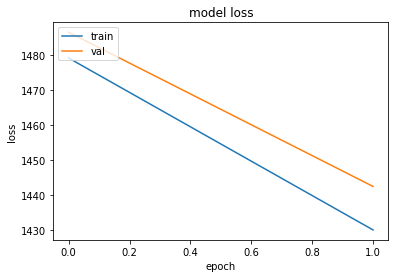

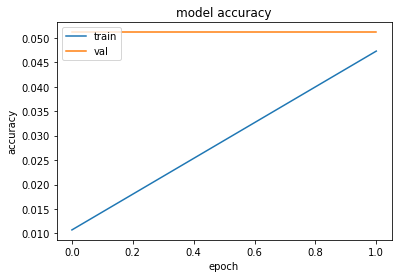

In [114]:
# summarize history for loss
plt.plot(hist_best_model.history['loss'])
plt.plot(hist_best_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

  
# summarize history for accuracy
plt.plot(hist_best_model.history['accuracy'])
plt.plot(hist_best_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


## GridSearchCV

In [ ]:
best_parameters = grid_search.best_params_
best_parameters

## K-FOLD VALIDATION